In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import numpy as np 
import pandas as pd 
import json
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.tokenize import wordpunct_tokenize
from tqdm import tqdm

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/'My Drive'/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


In [0]:
%cd gdrive/'My Drive'/

[Errno 2] No such file or directory: 'gdrive/My Drive/'
/content/gdrive/My Drive


In [0]:
!ls -l

total 1513347
-rw------- 1 root root   19062490 Mar 29  2019  1000_textes.txt
drwx------ 2 root root       4096 Sep 30  2018 '6 октября 2018'
-rw------- 1 root root     174044 Mar 28  2019  API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_10515265.csv
drwx------ 2 root root       4096 Jan  7  2019  Basic_stats
-rw------- 1 root root      48749 Dec  8 00:41  ClassificationSentimentModelsHSEpract.ipynb
drwx------ 2 root root       4096 Oct 28  2018 'Colab Notebooks'
-rw------- 1 root root        151 May  3  2019 'Copy of Подход на правилах.gslides'
drwx------ 2 root root       4096 Apr 14  2019  corpus
drwx------ 2 root root       4096 Dec 15  2018  Deutsch
drwx------ 2 root root       4096 Dec 15  2018  Diploms
-rw------- 1 root root        151 Dec 20 21:44  DL_project_end2019.gslides
drwx------ 2 root root       4096 Dec 15  2018  Docs
-rw------- 1 root root       9082 Dec 20 12:44  Elmo_from_DP.ipynb
-rw------- 1 root root    1581265 Aug  6 16:31  export.pkl
-rw------- 1 root root        151 Feb  

In [0]:
train = pd.read_csv('Ques_answ_merged.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [0]:
train.head()

,Unnamed: 0,main_category,sub_category,question,answer
0,0,4.0,32.0,Законно ли изменение количества дней листа нет...,"Ничего писать не нужно, разве что директору жа..."
1,1,4.0,32.0,Законно ли изменение количества дней листа нет...,И вы хотите ссориться с работодателем из-за 1 ...
2,2,4.0,32.0,Законно ли изменение количества дней листа нет...,"Чушь спрашиваете, 1 день больше 1 день меньше,..."
3,3,4.0,32.0,Законно ли изменение количества дней листа нет...,Что значит переносить не собираются? Куда они ...
4,4,4.0,32.0,Законно ли изменение количества дней листа нет...,В БЛ четко указаны даты ОБиР - с такого-то по ...


In [0]:
train = train[train.main_category.notna()]

In [0]:
train.main_category = train.main_category.astype(int)

In [0]:
answers = train[['main_category', 'answer']].drop_duplicates()
answers.columns = ['main_category', 'question']

In [0]:
train = pd.concat([train[['main_category', 'question']].drop_duplicates(),answers])

In [0]:
train.shape

(3721957, 2)

In [0]:
train.question = train.question.astype(str)
train['lenn'] = train.question.apply(len)
train_longer10 = train[(train.lenn>10)&(train.lenn<400)]

(array([1487952.,  870984.,  467224.,  198369.,  124891.,   88510.,
          62673.,   47263.,   35553.,   27091.]),
 array([ 11. ,  49.8,  88.6, 127.4, 166.2, 205. , 243.8, 282.6, 321.4,
        360.2, 399. ]),
 <a list of 10 Patch objects>)

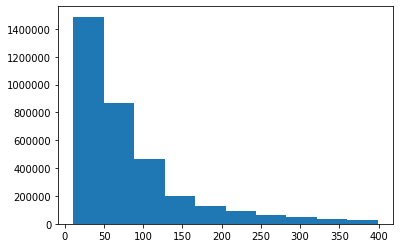

In [0]:
import matplotlib.pyplot as plt
plt.hist(train_longer10.lenn)

In [0]:
train_longer10.tail()

,main_category,question,lenn
3158904,5,в газету подай а лучше - во все.,32
3158906,4,Ты инвалид детства?Пенсия на каком основании?,45
3158907,4,"Дадут, ровно за 5 дней февраля. хочешт получат...",101
3158908,6,Материально то может им и хорошо...но морально...,57
3158909,6,"у тя жена молодая и красивая?кидай фотку, так ...",131


In [0]:
%time
from zipfile import ZipFile

downloaded_train = drive.CreateFile({'id':'10qtOKBsGFQlZ6YzQxV30uHT7truULE1E'}) 
downloaded_train.GetContentFile('train.csv.zip')

with ZipFile('train.csv.zip', 'r') as zipObj:
   zipObj.extractall()

down_main_cat_map = drive.CreateFile({'id': '1l70MFuRBb7IgaVn6hrx0_X3lU0_q0B7C'}) 
down_main_cat_map.GetContentFile('main_category_mapper.json')

downloaded_unsupervised = drive.CreateFile({'id':'1vTeZFDl4ugkRv_6mUCl7gJk8DMnE8ECB'}) 
downloaded_unsupervised.GetContentFile('unsupervised.csv.zip')

with ZipFile('unsupervised.csv.zip', 'r') as zipObj:
   zipObj.extractall()

down_sub_cat_map = drive.CreateFile({'id': '1SJhd1yLU2V6eKGKI_R7Gw0ybGC9RaxJu'}) 
down_sub_cat_map.GetContentFile('sub_category_mapper.json')

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.72 µs


In [0]:
import numpy as np 
import pandas as pd 
import json
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.tokenize import wordpunct_tokenize
from tqdm import tqdm

In [0]:
train = pd.read_csv('train.csv')

In [0]:
downloaded_sub = drive.CreateFile({'id':'1QqoCIhAJlMxW5_TSaNnOUU08civyHWOP'}) 
downloaded_sub.GetContentFile('test.csv')

In [0]:
test = pd.read_csv('test.csv')
test.head()

,index,question
0,0,"Подскажите сайт российский, вещи заказывать: )..."
1,1,Как заказать Рикардо Милоса в Москве?
2,2,"Пустят ли меня в Израиль, если я работаю в ОАЭ?"
3,3,почему о наличии пальмового масла и консервато...
4,4,Вот во всех бедах России винят правительство.....


In [0]:
import re
def filter_ru_en_words(x):
  x = ' '.join(re.findall('[a-zа-яё0-9]+', x.lower()))
  x = re.sub('[0-9]+', ' число ', x)
  x = re.sub('ё', 'е', x)
  x = re.sub('\s+', ' ', x)
  return x
train['w_cl'] = train.question.apply(filter_ru_en_words)

In [0]:
!pip install pymorphy2

In [0]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()
words = [j for i in train.w_cl.tolist() for j in i.split(' ')]
to_norm_form = { i: morph.parse(i)[0].normal_form for i in list(set(words))}

print('Vocab_size :', len(list(set(to_norm_form.values()))))

Vocab_size : 157775


In [0]:
def normalize(x):
  return ' '.join([to_norm_form[i] if i in to_norm_form else i for i in x.split(' ')])

train['norm_question'] = train.w_cl.apply(normalize)

In [0]:
import torch
from torch.utils.data import Dataset, DataLoader

from nltk.tokenize import word_tokenize, wordpunct_tokenize
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [0]:
train = train[['main_category', 'example']]
train.columns = ['main_category', 'question']

In [0]:
def process_text(text):
    
    return wordpunct_tokenize(text.lower())
    #text.split(' ')

In [0]:
word2freq = {}

for question in tqdm(train.question):
    
    words = process_text(question)
    
    for word in words:
        
        if word in word2freq:
            word2freq[word] += 1
        else:
            word2freq[word] = 1

100%|██████████| 666666/666666 [00:05<00:00, 132432.03it/s]


In [0]:
%cd ../..

/content


In [0]:
!wget http://vectors.nlpl.eu/repository/11/195.zip

--2019-12-20 22:36:13--  http://vectors.nlpl.eu/repository/11/195.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.225
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206977021 (197M) [application/zip]
Saving to: ‘195.zip’

195.zip             100%[===================>] 197.39M   518KB/s    in 13m 46s 

2019-12-20 22:49:59 (245 KB/s) - ‘195.zip’ saved [206977021/206977021]



In [0]:
!unzip 195.zip

Archive:  195.zip
  inflating: meta.json               
  inflating: model.hdf5              
  inflating: options.json            
  inflating: README                  
  inflating: vocab.txt               


In [0]:
!pip install allennlp

     |████████████████████████████████| 7.6MB 3.4MB/s 
     |████████████████████████████████| 194kB 59.0MB/s 
     |████████████████████████████████| 256kB 47.6MB/s 
     |████████████████████████████████| 245kB 33.4MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 163kB 63.0MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 
     |████████████████████████████████| 133kB 55.9MB/s 
     |████████████████████████████████| 1.0MB 44.1MB/s 
  Created wheel for jsonnet: filename=jsonnet-0.14.0-cp36-cp36m-linux_x86_64.whl size=3320387 sha256=a3fcb32b383a7b022dd55cd8730298f3f5ebc611eac5b3528fc2ef4c488e29c5
  Stored in directory: /root/.cache/pip/wheels/5b/b7/83/985f0f758fbb34f14989a0fab86d18890d1cc5ae12f26967bc
  Created wheel for word2number: filename=word2number-1.1-cp36-none-any.whl size=5588 sha256=1818cd7aba7e491aaceaac5fd6baf00112700d03c45070e8f94ba979793e1cf5
  Stored in directory: /root/.cache/pip/wheels/46/2f/53/5f5c1d275492f

In [0]:
!export CUDA_VISIBLE_DEVICES=1

In [0]:
!cat meta.json

{
    "algorithm": {
        "command": null,
        "id": 6,
        "name": "Embeddings from Language Models (ELMo)",
        "url": "https://allennlp.org/elmo",
        "version": null
    },
    "contents": [
        {
            "filename": "options.json",
            "format": "json"
        },
        {
            "filename": "meta.json",
            "format": "json"
        },
        {
            "filename": "model.hdf5",
            "format": "data"
        },
        {
            "filename": "vocab.txt",
            "format": "text"
        }
    ],
    "corpus": [
        {
            "NER": false,
            "case preserved": true,
            "description": "Russian Wikipedia dump of December 2018",
            "id": 103,
            "language": "rus",
            "lemmatized": false,
            "public": true,
            "stop words removal": null,
            "tagger": null,
            "tagset": null,
            "tokens": 654914888,
            "tool": "https

In [0]:
from allennlp.modules.elmo import Elmo, batch_to_ids

options_file = "options.json"
weight_file = "model.hdf5"

# Compute two different representation for each token.
# Each representation is a linear weighted combination for the
# 3 layers in ELMo (i.e., charcnn, the outputs of the two BiLSTM))
elmo = Elmo(options_file, weight_file, 1)

# use batch_to_ids to convert sentences to character ids
sentences = [['я', 'тут', '.']]
character_ids = batch_to_ids(sentences)

embeddings = elmo(character_ids)

In [0]:
word2index = {'PAD': 0}
vectors = []
    
word2vec_file = open('cc.ru.300.vec')
    
n_words, embedding_dim = word2vec_file.readline().split()
n_words, embedding_dim = int(n_words), int(embedding_dim)

# Zero vector for PAD
vectors.append(np.zeros((1, embedding_dim)))

progress_bar = tqdm(desc='Read word2vec', total=n_words)

while True:

    line = word2vec_file.readline().strip()

    if not line:
        break
        
    current_parts = line.split()

    current_word = ' '.join(current_parts[:-embedding_dim])

    if current_word in word2freq:

        word2index[current_word] = len(word2index)

        current_vectors = current_parts[-embedding_dim:]
        current_vectors = np.array(list(map(float, current_vectors)))
        current_vectors = np.expand_dims(current_vectors, 0)

        vectors.append(current_vectors)

    progress_bar.update(1)

progress_bar.close()

word2vec_file.close()

vectors = np.concatenate(vectors)

Read word2vec: 100%|██████████| 2000000/2000000 [01:20<00:00, 24918.58it/s]


In [0]:
unk_words = [word for word in word2freq if word not in word2index]
unk_counts = [word2freq[word] for word in unk_words]
n_unk = sum(unk_counts) * 100 / sum(list(word2freq.values()))

sub_sample_unk_words = {word: word2freq[word] for word in unk_words}
sorted_unk_words = list(sorted(sub_sample_unk_words, key=lambda x: sub_sample_unk_words[x], reverse=True))

print('Мы не знаем {:.2f} % слов в датасете'.format(n_unk))
print('Количество неизвестных слов {} из {}, то есть {:.2f} % уникальных слов в словаре'.format(
    len(unk_words), len(word2freq), len(unk_words) * 100 / len(word2freq)))
print('В среднем каждое встречается {:.2f} раз'.format(np.mean(unk_counts)))
print()
print('Топ 5 невошедших слов:')

for i in range(5):
    print(sorted_unk_words[i], 'с количеством вхождениий -', word2freq[sorted_unk_words[i]])

Мы не знаем 3.67 % слов в датасете
Количество неизвестных слов 1087038 из 1605861, то есть 67.69 % уникальных слов в словаре
В среднем каждое встречается 2.62 раз

Топ 5 невошедших слов:
:// с количеством вхождениий - 160002
). с количеством вхождениий - 65281
)) с количеством вхождениий - 54777
), с количеством вхождениий - 46012
))) с количеством вхождениий - 45007


In [0]:
w2f = [(k, v) for k, v in sorted(word2freq.items(), key=lambda item: item[1], reverse=True)]

In [0]:
w2f[:25]

[('?', 403588),
 (',', 262851),
 ('в', 206664),
 ('.', 175824),
 ('на', 132762),
 ('как', 113141),
 ('и', 110618),
 ('что', 105986),
 ('не', 85736),
 ('ли', 81340),
 ('с', 78230),
 ('-', 74052),
 ('можно', 45264),
 ('по', 45076),
 ('или', 43236),
 ('если', 42678),
 ('а', 41606),
 ('(', 37978),
 ('у', 37612),
 ('почему', 37158),
 ('"', 37054),
 ('для', 36844),
 ('это', 34831),
 ('помогите', 34358),
 (')', 33495)]

In [0]:
train = train[350000:]

In [0]:
sequence = ['f', 'f', 'f', 'f', 'f', 'f', 'f']+['f', 'f', 'f', 'f', 'f', 'f', 'f']+['f', 'f', 'f', 'f', 'f', 'f', 'f']+['f', 'f', 'f', 'f', 'f', 'f', 'f']+['f', 'f', 'f', 'f', 'f', 'f', 'f']+['f', 'f', 'f', 'f', 'f', 'f', 'f']
s = (32 if len(sequence)>=32 else len(sequence))
s

32

In [0]:
from torch.utils.data import Dataset
class WordData(Dataset):
    
    def __init__(self, x_data, y_data, verbose=True):
        
        super().__init__()
        
        self.x_data = []
        self.y_data = y_data
        self.pad_token = 'unk'
        self.sequence_length = 32
      
        
        self.load(x_data, verbose=verbose)
 
    def padding(self, sequence):
        
        # Ограничить длину self.sequence_length
        # если длина меньше максимально - западить
        
        ### CODE ###
        s = (self.sequence_length if len(sequence)>=32 else len(sequence))

        if len(sequence) > self.sequence_length:
            sequence = sequence[:self.sequence_length]

        elif len(sequence) < self.sequence_length:
            sequence = sequence + [self.pad_token] * (self.sequence_length - len(sequence))

        return sequence, s
        
    @staticmethod
    def process_text(text):
    
        words = wordpunct_tokenize(text.lower())

        return words
    
        
    def load(self, data, verbose=True):
        
        data_iterator = tqdm(data, desc='Loading data', disable=not verbose)
        
        for text in data_iterator:
            words = self.process_text(text)
            seq, s = self.padding(words)
            indexed_words = batch_to_ids([seq])
            #print(indexed_words.shape)
            self.x_data.append((indexed_words, s))
            

    def __len__(self):
        
        return len(self.x_data)
    
    def __getitem__(self, idx):
        
        x, s = self.x_data[idx][0], self.x_data[idx][1]
      
        #x = torch.Tensor(x).long()
        
        y = self.y_data[idx]
        
        return x, y, s

In [0]:
for instance in list(tqdm._instances):
    tqdm._decr_instances(instance)

In [0]:
x_train, x_validation, y_train, y_validation = train_test_split(train.question, train.main_category, test_size=0.05)

train_dataset = WordData(list(x_train), list(y_train))
train_loader = DataLoader(train_dataset, batch_size=256,)

Loading data: 100%|██████████| 300832/300832 [01:24<00:00, 3579.66it/s]


In [0]:
validation_dataset = WordData(list(x_validation), list(y_validation))
validation_loader = DataLoader(validation_dataset, batch_size=512)

Loading data: 100%|██████████| 15834/15834 [00:04<00:00, 3628.11it/s]


In [0]:
test_dataset = WordData(list(test.question), np.zeros((test.shape[0])))
test_loader = DataLoader(test_dataset, batch_size=512)

Loading data: 100%|██████████| 200000/200000 [00:55<00:00, 3606.20it/s]


In [0]:
for x, y, s in train_loader:
  print(x.squeeze(1).shape)
  print(elmo(x.squeeze(1))['elmo_representations'][0].shape)
  break

torch.Size([128, 32, 50])
torch.Size([128, 32, 1024])


In [0]:
n_classes = train.main_category.unique().shape[0]

In [0]:
from math import sqrt
class model_with_att(torch.nn.Module):
  def __init__(self, out_GRu_feat, n):
        
        super().__init__()
        
        self.out_GRu_feat = out_GRu_feat

        self.out_biGRu = int(self.out_GRu_feat * 2)
        self.out_CNN = int(self.out_GRu_feat * 3)
        self.n = int(n)

        self.drop_emb = torch.nn.Dropout(0.15)

        self.LSTM = torch.nn.LSTM(1024, out_GRu_feat, num_layers = 2, dropout = 0.25, bidirectional=True, batch_first=True) 

        #attention
        
        self.q_proj = torch.nn.Linear(self.out_biGRu, self.out_biGRu)
        self.k_proj = torch.nn.Linear(self.out_biGRu, self.out_biGRu)
        self.v_proj = torch.nn.Linear(self.out_biGRu, self.out_biGRu)
        self.att_soft = torch.nn.Softmax(dim = 2)

        self.q_proj1 = torch.nn.Linear(self.out_biGRu, self.out_biGRu)
        self.k_proj1 = torch.nn.Linear(self.out_biGRu, self.out_biGRu)
        self.v_proj1 = torch.nn.Linear(self.out_biGRu, self.out_biGRu)
        
        self.permutate = torch.nn.Linear(self.out_biGRu*2, self.out_biGRu)

        self.cnn_3gr = torch.nn.Conv1d(in_channels=int(self.out_biGRu) , out_channels=self.out_GRu_feat, kernel_size=3)
        self.cnn_4gr = torch.nn.Conv1d(in_channels=int(self.out_biGRu) , out_channels=self.out_GRu_feat, kernel_size=4)
        self.cnn_5gr = torch.nn.Conv1d(in_channels=int(self.out_biGRu) , out_channels=self.out_GRu_feat, kernel_size=5)

        self.bn1 = torch.nn.BatchNorm1d(self.out_CNN)
        
        self.linear_1 = torch.nn.Linear(in_features=self.out_CNN, out_features=750)
        gl = sqrt(6./(self.out_CNN+750))
        self.linear_1.weight.data.uniform_(-gl, gl)

        self.relu = torch.nn.ReLU()

        self.drop_out = torch.nn.Dropout(0.1)

        self.bn2 = torch.nn.BatchNorm1d(750)

        self.linear_2 = torch.nn.Linear(in_features=750, out_features=n)
        gl2 = sqrt(6./(750+n))
        self.linear_2.weight.data.uniform_(-gl2, gl2)

        
  def forward(self, x, x_len):

      x_packed = pack_padded_sequence(x, x_len, batch_first=True, enforce_sorted=False)

      x_lstm, _ = self.LSTM(x_packed)

      x, _ = pad_packed_sequence(x_lstm, batch_first=True)
      
      x_q = self.q_proj(x)
      x_k = self.k_proj(x)
      x_v = self.v_proj(x)

      x_q1 = self.q_proj1(x)
      x_k1 = self.k_proj1(x)
      x_v1 = self.v_proj1(x)

      att_scores = torch.bmm(x_q, x_k.transpose(2,1))/self.out_GRu_feat
      att_dist = self.att_soft(att_scores)
      attention_vectors = torch.bmm(att_dist, x_v)

      att_scores1 = torch.bmm(x_q1, x_k1.transpose(2,1))/self.out_GRu_feat
      att_dist1 = self.att_soft(att_scores1)
      attention_vectors1 = torch.bmm(att_dist1, x_v1)

      x_two_at = torch.cat((attention_vectors, attention_vectors1), dim=-1)

      x_two_at = self.permutate(x_two_at)
      x_gru_s_t = x_two_at.transpose(2,1)

      x_cnn3 = self.cnn_3gr(x_gru_s_t)
      x_cnn4 = self.cnn_4gr(x_gru_s_t)
      x_cnn5 = self.cnn_5gr(x_gru_s_t)

      frst, _ =  x_cnn3.max(dim= -1,)
      sc, _ = x_cnn4.max(dim= -1,)
      thr, _ = x_cnn5.max(dim= -1,)
      
      px = torch.cat((frst, sc, thr), dim=-1)
      
      x = self.bn1(px)
      x = self.linear_1(x)
      x = self.relu(x)
      x = self.drop_out(x)
      x = self.bn2(x)
      x = self.linear_2(x)
    
      return x

In [0]:
model = model_with_att(500, n_classes)

In [0]:
from torch.nn.utils.rnn import pack_padded_sequence
from torch.nn.utils.rnn import pad_packed_sequence

In [0]:
max(len_x)

tensor(40)

In [0]:
with torch.no_grad():
    x = x.squeeze(1)
    x = elmo(x.squeeze(1))['elmo_representations'][0]
    pred = model(x, s)

In [0]:
pred.shape

torch.Size([128, 28])

In [0]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [0]:
!head config

In [0]:
model

model_with_att(
  (drop_emb): Dropout(p=0.15, inplace=False)
  (LSTM): LSTM(1024, 500, num_layers=2, batch_first=True, dropout=0.25, bidirectional=True)
  (q_proj): Linear(in_features=1000, out_features=1000, bias=True)
  (k_proj): Linear(in_features=1000, out_features=1000, bias=True)
  (v_proj): Linear(in_features=1000, out_features=1000, bias=True)
  (att_soft): Softmax(dim=2)
  (q_proj1): Linear(in_features=1000, out_features=1000, bias=True)
  (k_proj1): Linear(in_features=1000, out_features=1000, bias=True)
  (v_proj1): Linear(in_features=1000, out_features=1000, bias=True)
  (permutate): Linear(in_features=2000, out_features=1000, bias=True)
  (cnn_3gr): Conv1d(1000, 500, kernel_size=(3,), stride=(1,))
  (cnn_4gr): Conv1d(1000, 500, kernel_size=(4,), stride=(1,))
  (cnn_5gr): Conv1d(1000, 500, kernel_size=(5,), stride=(1,))
  (bn1): BatchNorm1d(1500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear_1): Linear(in_features=1500, out_features=750, bias=True

In [0]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters())


In [0]:
model = model.to(device)
criterion = criterion.to(device)

In [0]:
elmo = elmo.cpu()

In [0]:
from torch.nn.utils.rnn import pack_padded_sequence

epochs = 2
losses = []
best_test_loss = 10.

test_f1 = []

for n_epoch in range(epochs):
    
    train_losses = []
    test_losses = []
    test_targets = []
    test_pred_class = []
    
    progress_bar = tqdm(total=len(train_loader.dataset), desc='Epoch {}'.format(n_epoch + 1))
    
    model.train()
    i=0
    for x, y, x_len in train_loader:
        i+=1
        if i%50 ==0:
          torch.save({
              'epoch': n_epoch,
              'model_state_dict': model.state_dict(),
              'optimizer_state_dict': optimizer.state_dict(),
              }, 'model.pkl')

        
        x = x.squeeze(1)
        
        with torch.no_grad():
          x = elmo(x)['elmo_representations'][0] 
        
        x_len = x_len.to(device)
        x = x.to(device)
        y = y.to(device)

       
        optimizer.zero_grad()
        
        pred = model(x, x_len)
        
        loss = criterion(pred, y)
        
        loss.backward()
        
        optimizer.step()
        
        train_losses.append(loss.item())
        losses.append(loss.item())
        
        progress_bar.set_postfix(train_loss = np.mean(losses[-500:]))

        progress_bar.update(x.shape[0])
        
    progress_bar.close()
    
    model.eval()
    
    for x, y, x_len in validation_loader:
        
        x = x.squeeze(1)
        
        with torch.no_grad():
          x = elmo(x)['elmo_representations'][0] 

        x = x.to(device)
        x_len = x_len.to(device)
        y = y.to(device)

        with torch.no_grad():

            pred = model(x, x_len)

            pred = pred.cpu()
            y = y.cpu()

            test_targets.append(y.numpy())
            test_pred_class.append(np.argmax(pred, axis=1))

            loss = criterion(pred, y)

            test_losses.append(loss.item())
        
    mean_test_loss = np.mean(test_losses)

    test_targets = np.concatenate(test_targets).squeeze()
    test_pred_class = np.concatenate(test_pred_class).squeeze()

    f1 = f1_score(test_targets, test_pred_class, average='micro')

    test_f1.append(f1)
    
    print()
    print('Losses: train - {:.3f}, test - {:.3f}'.format(np.mean(train_losses), mean_test_loss))

    print('F1 test - {:.3f}'.format(f1))
        
    # Early stopping:
    if mean_test_loss < best_test_loss:
        best_test_loss = mean_test_loss
    else:
        print('Early stopping')
        break 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/'My Drive'/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


In [0]:
torch.save({
            'epoch': n_epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            }, 'model.pkl')

In [0]:
checkpoint = torch.load('model.pkl')

In [0]:
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [0]:
!ls

In [0]:
model.eval()

predictions = []

for x, y, x_len in test_loader:
    x = x.squeeze(1)
        
    with torch.no_grad():
      x = elmo(x)['elmo_representations'][0] 

    x = x.to(device)

    with torch.no_grad():

        pred = model(x,x_len)

        pred = pred.cpu()
        
        predictions.append(np.argmax(pred, axis=1))
        
predictions = np.concatenate(predictions).squeeze()

In [0]:
test['main_category'] = predictions

In [0]:
test = test[['index', 'main_category']]

In [0]:
test.head()

,index,main_category
0,0,9
1,1,15
2,2,18
3,3,17
4,4,12


In [0]:
test.to_csv('submission123.csv', index=False)

In [0]:
from google.colab import files
files.download('submission123.csv')